<img src=https://storage.googleapis.com/pr-newsroom-wp/1/2018/11/Spotify_Logo_RGB_Green.png width="700">

# Buisness Problem
### Record labels and music production companys are always looking for the next big hit. Being able to predict whether a song will be successful would allow music companies to focus their efforts most efficiently. If you are able to predict which songs have the potential to be the next big song, or can reverse engineer what society likes, you would be able to engineer the perfect song.

### Additionally, music is a powerful marketing tool, and signifies current trends. If you can anticipate the direction that music, and hence social trends, are moving, there would be powerful implications for both the music industry, the advertising industry, and even investors who may speculate on the popularity of various fads and fashion trends. 

# Goals
### During this data science project, I hope to accomplish the following:
* To predict whether a given song is popular in its respective decade
* To understand what features contribute to a song being a hit
* To analyze how features/preferances change over time

## Step 1: Importing the data

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

file_location_60s = "../data/dataset-of-60s.csv"
file_location_70s = "../data/dataset-of-70s.csv"
file_location_80s = "../data/dataset-of-80s.csv"
file_location_90s = "../data/dataset-of-90s.csv"
file_location_00s = "../data/dataset-of-00s.csv"
file_location_10s = "../data/dataset-of-10s.csv"

df_60s = pd.read_csv(file_location_60s, delimiter = ',')
df_70s = pd.read_csv(file_location_70s, delimiter = ',')
df_80s = pd.read_csv(file_location_80s, delimiter = ',')
df_90s = pd.read_csv(file_location_90s, delimiter = ',')
df_00s = pd.read_csv(file_location_00s, delimiter = ',')
df_10s = pd.read_csv(file_location_10s, delimiter = ',')

df_90s.head()

,track,artist,uri,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,target
0,Misty Roses,Astrud Gilberto,spotify:track:50RBM1j1Dw7WYmsGsWg9Tm,0.527,0.316,1,-15.769,1,0.0310,0.693000,0.00699,0.1680,0.543,116.211,158840,4,53.89523,6,0
1,Never Ever,All Saints,spotify:track:5FTz9qQ94PyUHETyAyfYZN,0.738,0.541,1,-5.485,1,0.0311,0.559000,0.00000,0.0492,0.309,134.187,387573,4,32.16853,16,1
2,Soul Sermon,Gregg Karukas,spotify:track:6m24oe3lk1UMxq9zq4iPFi,0.736,0.419,0,-10.662,1,0.0300,0.693000,0.49500,0.0809,0.265,93.982,237267,4,42.05369,9,0
3,Clarinet Marmalade - Live,Alton Purnell,spotify:track:5FOXuiLI6knVtgMUjWKj6x,0.565,0.594,5,-13.086,1,0.0646,0.655000,0.92600,0.6750,0.763,114.219,375933,4,80.99693,10,0
4,До смерті і довше - Drum & Base and Rock Remix,Skryabin,spotify:track:6CxyIPTqSPvAPXfrIZczs4,0.513,0.760,4,-10.077,1,0.0355,0.000017,0.00339,0.1530,0.961,153.166,430653,4,25.57331,20,0


## Step 2: Data Cleaning and Inspection

Inspecting the features, and their data types. I dont think I will be using the first 3 features
for prediction. I will likely <br>drop them, but will keep them around for data exploration phase.
The rest of the data looks to be in the form that<br> we want!

In [3]:
df_90s.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5520 entries, 0 to 5519
Data columns (total 19 columns):
track               5520 non-null object
artist              5520 non-null object
uri                 5520 non-null object
danceability        5520 non-null float64
energy              5520 non-null float64
key                 5520 non-null int64
loudness            5520 non-null float64
mode                5520 non-null int64
speechiness         5520 non-null float64
acousticness        5520 non-null float64
instrumentalness    5520 non-null float64
liveness            5520 non-null float64
valence             5520 non-null float64
tempo               5520 non-null float64
duration_ms         5520 non-null int64
time_signature      5520 non-null int64
chorus_hit          5520 non-null float64
sections            5520 non-null int64
target              5520 non-null int64
dtypes: float64(10), int64(6), object(3)
memory usage: 819.5+ KB


###### lets check to see if there are any missing values in our data set

In [4]:
print(df_90s.isnull().sum())

track               0
artist              0
uri                 0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
duration_ms         0
time_signature      0
chorus_hit          0
sections            0
target              0
dtype: int64


## Missing value imputation demo 

<p style="line-height:1.5">
There are no missing values, however as a demonstration of what I learned in INFO 577, I would like to
show how I would go about imputing values if there was any missing or otherwise invalid data.
</p>
<p>
I think using a KNN imputor would be a resonable candidate for imputation. In general, KNN is useful for data in which samples with similar vlaues of 1 feature also have similar value of another feature. This may apply to our dataset consisting of music, since songs within similar genres typically share other similar characteristics, i.e. metal music is commonly loud, pop music is commonly short in duration. 
</p>
<p>
Of course, we could try many different imputation methodologies to determine which is best suited for the dataset, however since this is just an example, I will stick to using only 1 method for demonstation purposes.
</p>


In [5]:
import numpy as np
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=3, weights="uniform")
imputed_df = imputer.fit_transform(df_90s.iloc[:,3:]) #for demonstation purposed

## Step 3: Data Exploration
#### In this cell we can look at the characteristics of a hit over time:

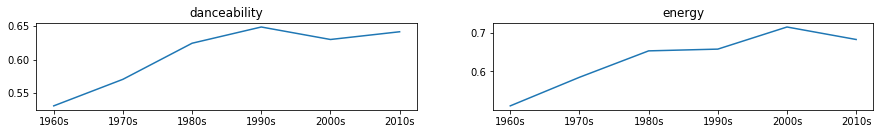

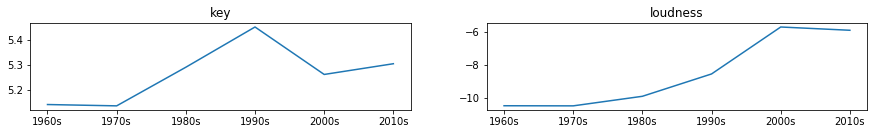

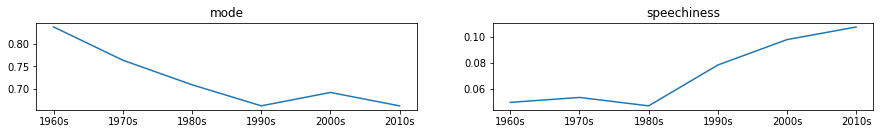

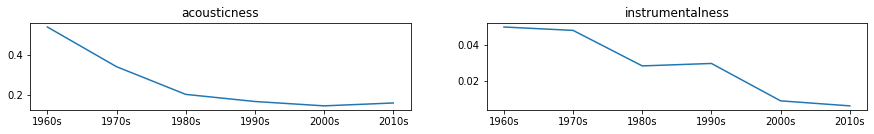

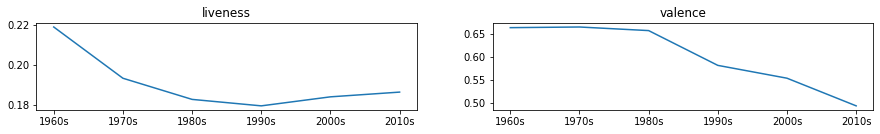

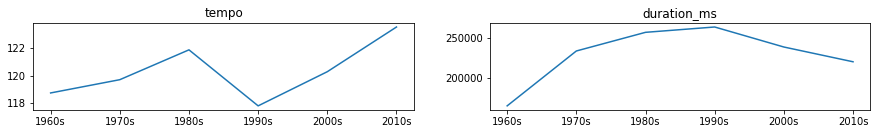

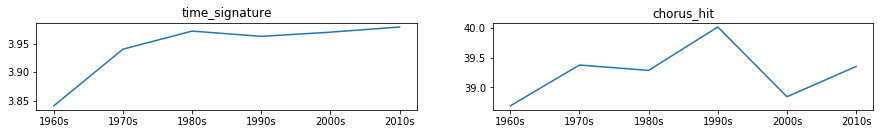

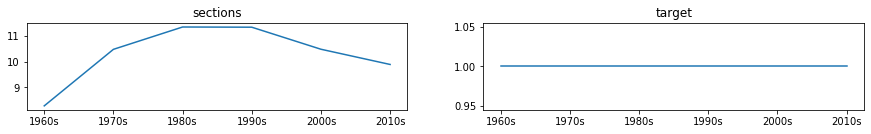

In [6]:
df_trends_hits = df_10s[df_10s['target']==1].mean().to_frame()

df_trends_hits['1960s'] = df_60s[df_60s['target']==1].mean()
df_trends_hits['1970s'] = df_70s[df_70s['target']==1].mean()
df_trends_hits['1980s'] = df_80s[df_80s['target']==1].mean()
df_trends_hits['1990s'] = df_90s[df_90s['target']==1].mean()
df_trends_hits['2000s'] = df_00s[df_00s['target']==1].mean()
df_trends_hits['2010s'] = df_10s[df_10s['target']==1].mean()

for i in range(0,15,2):
    
    fig = plt.figure(figsize=(15, 15))  # specify (width,height) in inches
    
    ax = fig.add_subplot(8,2,i+1)
    ax.plot( df_trends_hits.iloc[[i],1:].transpose().index,df_trends_hits.iloc[[i],1:].transpose())
    ax.title.set_text(df_trends_hits.iloc[[i],1:].transpose().columns[0])
    
    ax = fig.add_subplot(8,2,i+2)
    ax.plot( df_trends_hits.iloc[[i],1:].transpose().index,df_trends_hits.iloc[[i+1],1:].transpose())
    ax.title.set_text(df_trends_hits.iloc[[i+1],1:].transpose().columns[0])

plt.show()

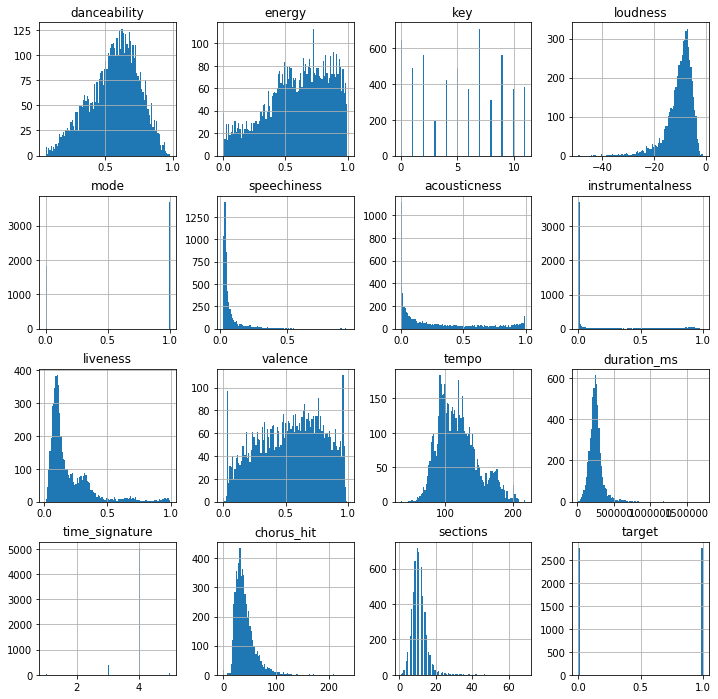

In [1376]:
#in this cell, we can examine the distribution of the various features.
fig, axes = plt.subplots(len(df_90s.columns)//4, 4, figsize=(12, 12))
for col, axis in zip(df_90s.columns[3:], axes.flatten()):
    df_90s.hist(column = col, bins = 100, ax=axis)

## Correlations and Observations
I am interested in diving deeper into the distibutions of each feature. A great method to visually investigate feature distributions, and how they relate to each other, is through a correlation matrix. If a scatter plot between 2 variables is diagonal, then the variables are highly correlated. Across the main diagonal, pairplot makes a histogram to illustate the frequency distrobution.

Going one step further, I color code the code according to it's, label (Hit in orange and non-Hit in blue). There are a number of insights that can be garnered now; Each entry in the matrix now becomes a miniature classification problem. Many of the entries have large section with non-hits, or dense areas of hits. This means that utilizing those respective 2 features is likely to add a lot of stregth to a model which incorporates it.

Since it is noted that many of these entries appear to be partially separable, this would lead to a tree based appraoch of modeling. Random Forests use a high number of weak learners (like a descision stump, spliting off of one feature, in order to reduce bias after aggregation. Visually imaginig separating the data based on an element below is precisely what happens when you use a desision tree of depth 2.

/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


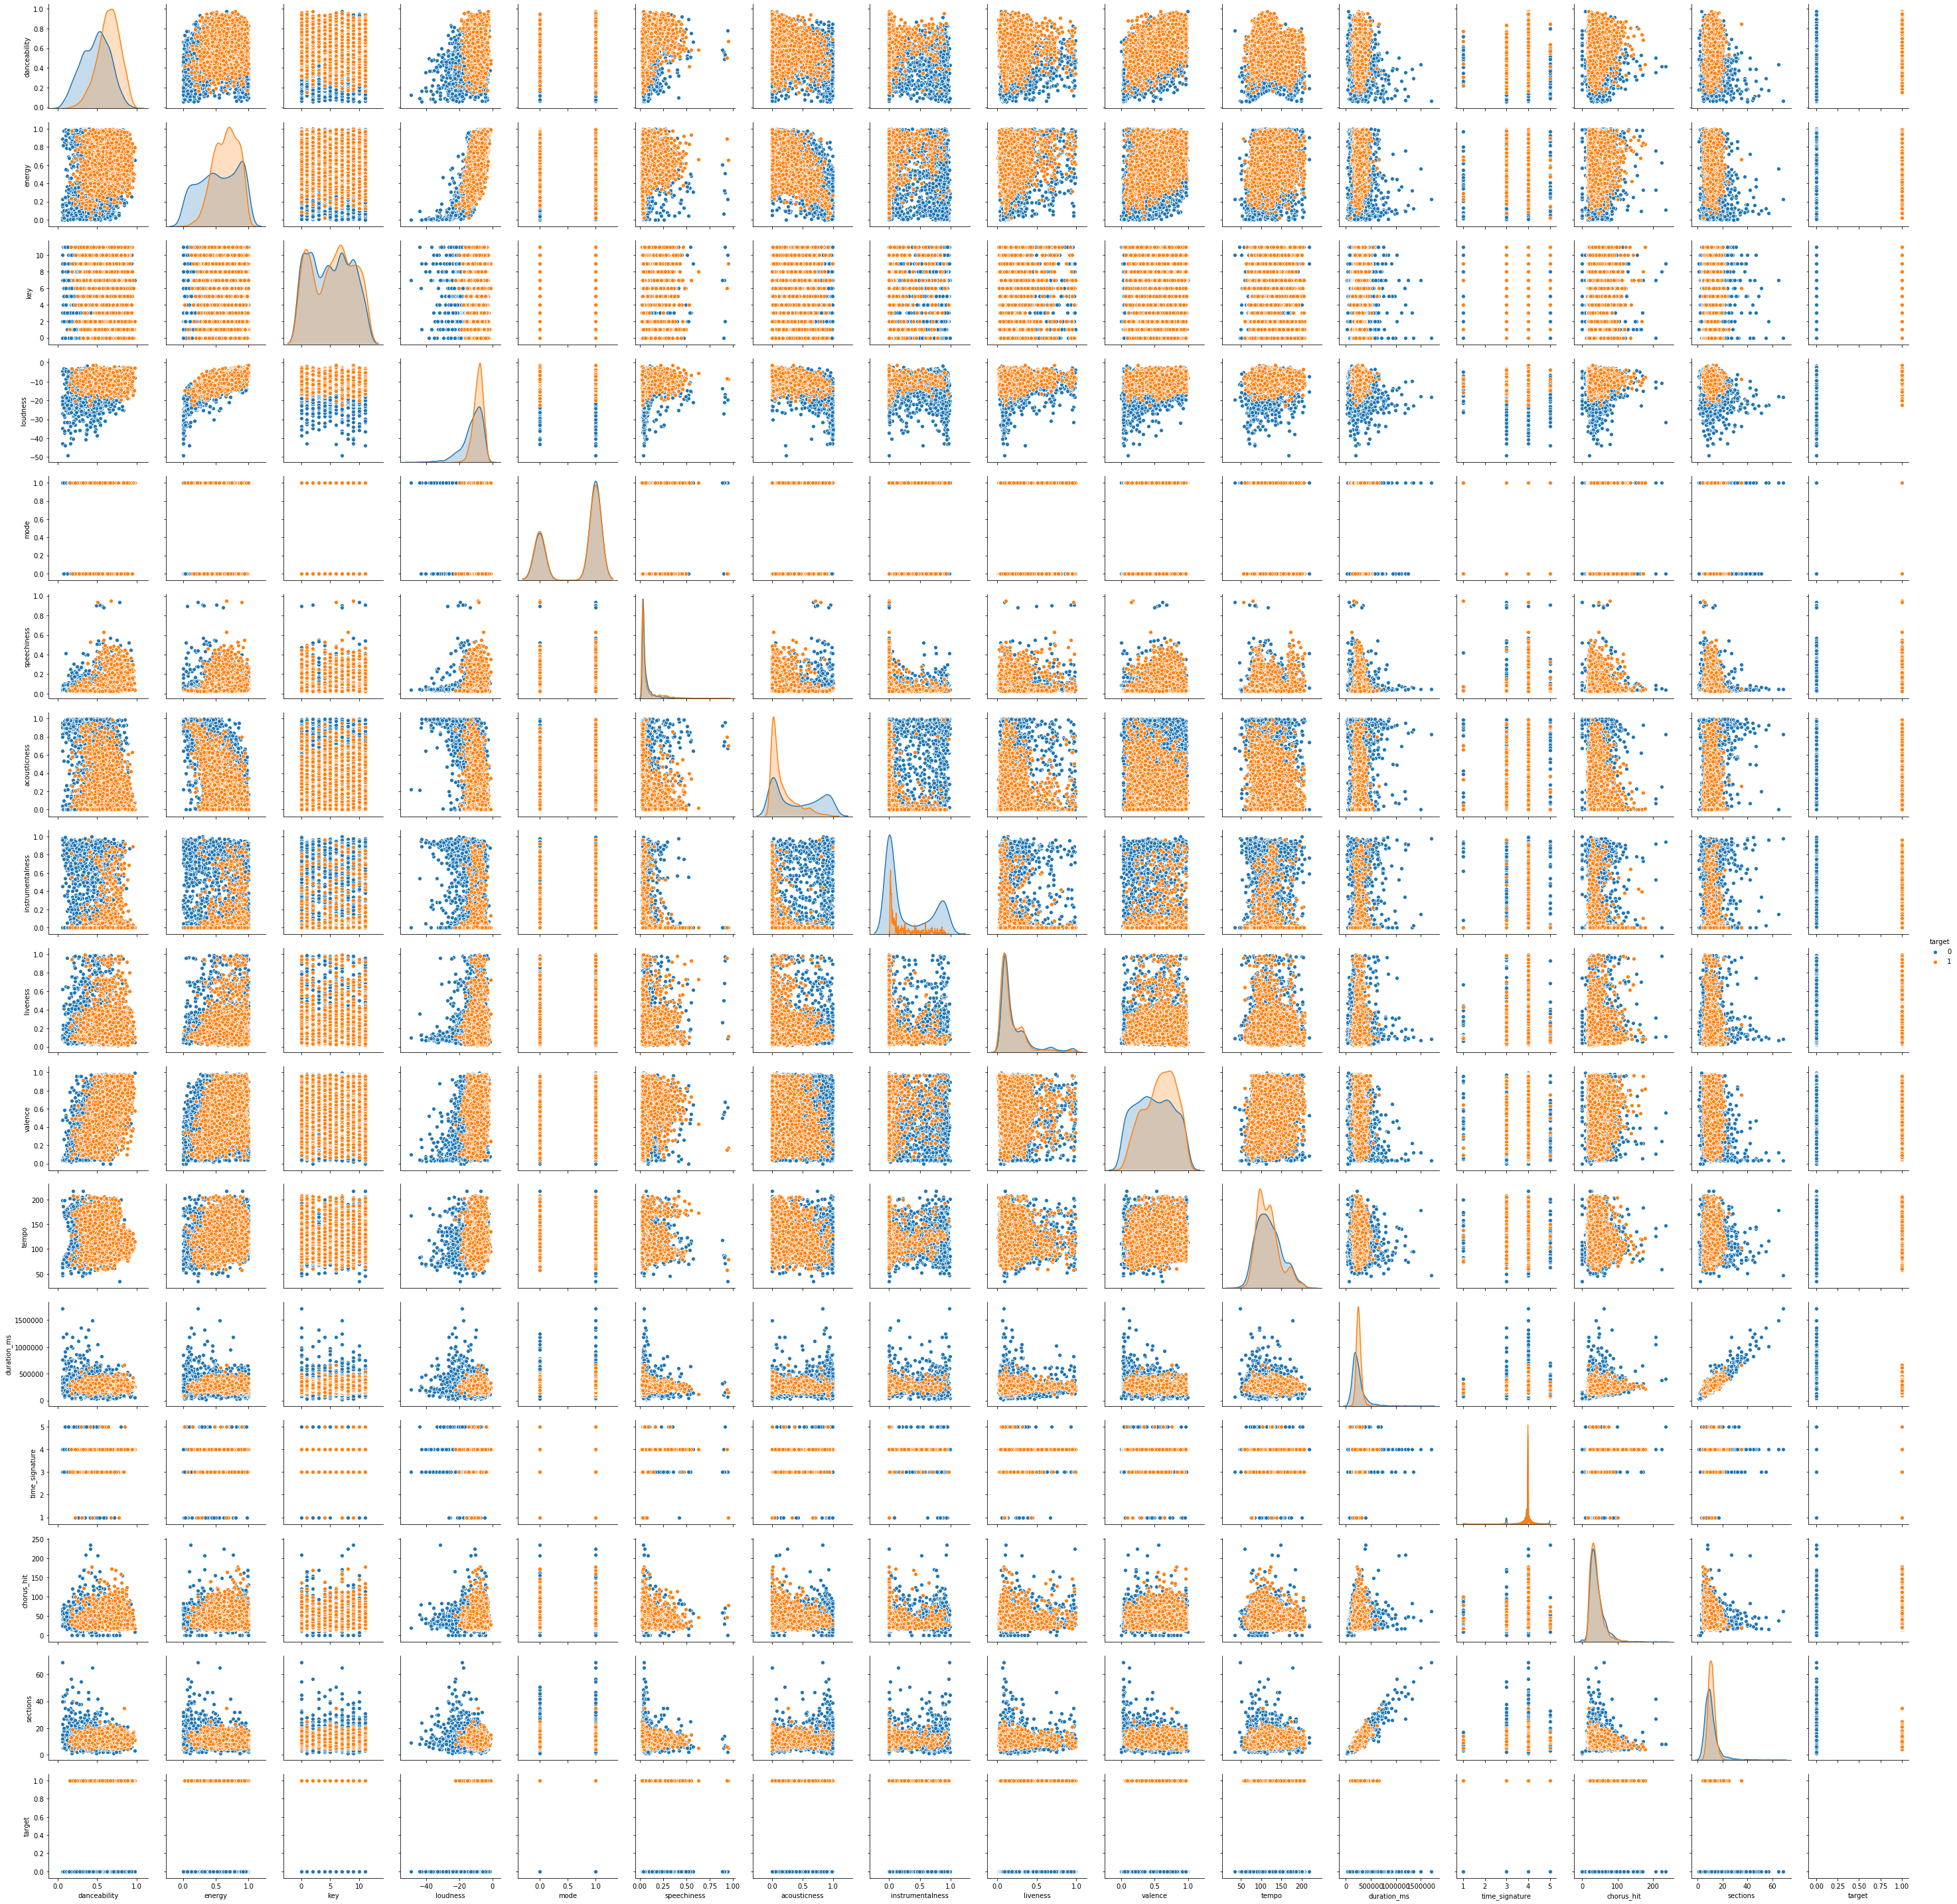

In [1339]:
import seaborn as sns
sns.pairplot(df_90s.iloc[3:], hue="target");

##### The Duration vs. Loudness
This scatter plot shows that the "hits" are very densely focused towards short and loud songs

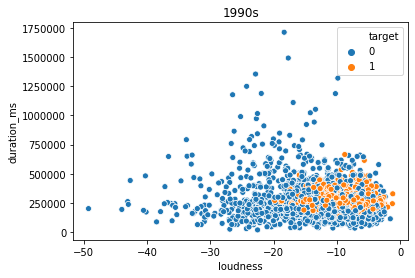

In [1340]:
sns.scatterplot(df_90s["loudness"],df_90s["duration_ms"], hue = "target", data = df_90s)
plt.title('1990s')
plt.show()

## Step 4: Preprocessing
##### Standardization and Normalization

In [1397]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_90s.iloc[:,3:-1] = scaler.fit_transform(df_90s.iloc[:,3:-1])
df_90s.iloc[:,3:].mean(axis = 0) #uncomment to check that the mean of each feature is 0 (it is)
df_90s.iloc[:,3:].std(axis = 0)  #uncomment to check that the std of each feature is 1 (it is)

danceability        1.000091
energy              1.000091
key                 1.000091
loudness            1.000091
mode                1.000091
speechiness         1.000091
acousticness        1.000091
instrumentalness    1.000091
liveness            1.000091
valence             1.000091
tempo               1.000091
duration_ms         1.000091
time_signature      1.000091
chorus_hit          1.000091
sections            1.000091
target              0.500045
dtype: float64

# Step 5: Modeling

Now I'm going to try several different models which I think may be appropriate for the data, and evaluate their performance.

### Baseline Models

In [1398]:
from sklearn.model_selection import train_test_split

X_baseline = df_90s.iloc[:,3:-1]
Y_baseline = df_90s.iloc[:,-1]
x_train_baseline, x_test_baseline, y_train_baseline, y_test_baseline = train_test_split(X_baseline, Y_baseline, test_size = 0.2, random_state=5)
hide_toggle()

Lets take a look at how important certain features are

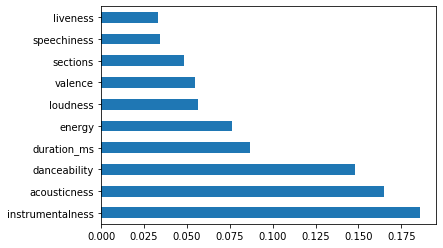

In [1380]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier(n_estimators=600,min_samples_split=2,min_samples_leaf=2,max_features="auto",max_depth=60,bootstrap=False)
model.fit(x_train_baseline,y_train_baseline)

feat_importances = pd.Series(model.feature_importances_, index=X_baseline.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

feature_list = feat_importances.nlargest(10)

### Now lets make predictions using my make_predictions function

In [1382]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

#from sklearn.linear_model import LogisticClassifier I tried un-installing and re-installing sk-learn but it appears to be correcpted on my computor. I will need to reload anaconda at a later date

def make_predictions(X_baseline, Y_baseline):
    x_train_baseline, x_test_baseline, y_train_baseline, y_test_baseline = train_test_split(X_baseline, Y_baseline, test_size = 0.2, random_state=5)
    num_iterations = 1
    error_list=[0]*num_iterations
    average_baseline_error=0
    for i in range(num_iterations): ##Random Forest is inherantly random, so taking an average error across several iterations may help
        rf = RandomForestClassifier()
        rf.fit(x_train_baseline, y_train_baseline)
        y_pred_baseline = rf.predict(x_test_baseline)
        wrong = sum(abs(y_test_baseline-y_pred_baseline))
        correct_pred_baseline = 100*wrong/len(y_pred_baseline)
        error_list[i] = correct_pred_baseline
    #print(error_list)
    average_baseline_error = sum(error_list)/num_iterations

    print("The model performance for baseline Random Forrest model is:")
    print("---------------------------------------------")
    print('mean absoulte error is {}%'.format(round(average_baseline_error,2)),'\n')

    gb = GradientBoostingClassifier()
    error_list=[0]*100
    average_baseline_error=0

    gb.fit(x_train_baseline, y_train_baseline)
    y_pred_gb_baseline = gb.predict(x_test_baseline)
    wrong = sum(abs(y_test_baseline-y_pred_gb_baseline))
    correct_pred_baseline = 100*wrong/len(y_pred_gb_baseline)
    #error_list[i] = correct_pred_baseline
    print("The model performance for baseline Gradient Boosting Classifier model is:")
    print("---------------------------------------------")
    print('mean absoulte error is {}%'.format(round(correct_pred_baseline,2)),'\n')

    knn = KNeighborsClassifier(n_neighbors=8)
    error_list=[0]*100
    average_baseline_error=0
    
    knn.fit(x_train_baseline, y_train_baseline)
    y_pred_knn_baseline = knn.predict(x_test_baseline)
    wrong = sum(abs(y_test_baseline-y_pred_knn_baseline))
    correct_pred_baseline = 100*wrong/len(y_pred_knn_baseline)
    #error_list[i] = correct_pred_baseline
    print("The model performance for baseline KNN model is:")
    print("---------------------------------------------")
    print('mean absoulte error is {}%'.format(round(correct_pred_baseline,2)),'\n')

    #lc = LogisticClassifier()
    #lc.fit(x_train_baseline, y_train_baseline)
    #y_pred_lc_baseline = lc.predict(x_test_baseline)
    #wrong = sum(abs(y_test_baseline-y_pred_lc_baseline))
    #correct_pred_baseline = 100*wrong/len(y_pred_lc_baseline)
    #error_list[i] = correct_pred_baseline
    #print("The model performance for baseline Logistic Regression model is:")
    #print("---------------------------------------------")
    #print('mean absoulte error is {}%'.format(round(correct_pred_baseline,2)))


    ada_b = AdaBoostClassifier()
    print(y_train_baseline.shape)
    ada_b.fit(x_train_baseline, y_train_baseline)
    y_pred_ada_baseline = ada_b.predict(x_test_baseline)
    wrong = sum(abs(y_test_baseline-y_pred_ada_baseline))
    correct_ada_pred_baseline = 100*wrong/len(y_pred_ada_baseline)
    #error_list[i] = correct_pred_baseline
    print("The model performance for baseline AdaBoost model is:")
    print("---------------------------------------------")
    print('mean absoulte error is {}%'.format(round(correct_ada_pred_baseline,2)))
hide_toggle()

In [1399]:
make_predictions(X_baseline, Y_baseline)

The model performance for baseline Random Forrest model is:
---------------------------------------------
mean absoulte error is 16.03% 

The model performance for baseline Gradient Boosting Classifier model is:
---------------------------------------------
mean absoulte error is 14.95% 

The model performance for baseline KNN model is:
---------------------------------------------
mean absoulte error is 19.93% 

(4416,)
The model performance for baseline AdaBoost model is:
---------------------------------------------
mean absoulte error is 16.94%


# Step 6: Feature Engineering and Feature Importance

In [1400]:
from itertools import combinations
import seaborn as sns
def engineer_my_features():
    combi = combinations([4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16], 2)
    df_features = df_90s.iloc[:,-1].copy().to_frame()

    for i in list(combi): 
        df_features.insert(0, "interaction of " + str(df_90s.columns[i[0]] ) + " * " + str(df_90s.columns[i[1]] ) , df_90s.iloc[:,i[0]] * df_90s.iloc[:,i[1]])
    
    return df_features.head(3)
hide_toggle()

In [1401]:
engineer_my_features()

,interaction of time_signature * chorus_hit,interaction of duration_ms * chorus_hit,interaction of duration_ms * time_signature,interaction of tempo * chorus_hit,interaction of tempo * time_signature,interaction of tempo * duration_ms,interaction of valence * chorus_hit,interaction of valence * time_signature,interaction of valence * duration_ms,interaction of valence * tempo,...,interaction of energy * tempo,interaction of energy * valence,interaction of energy * liveness,interaction of energy * instrumentalness,interaction of energy * acousticness,interaction of energy * speechiness,interaction of energy * mode,interaction of energy * loudness,interaction of energy * key,target
0,0.142162,-0.608851,-0.206936,-0.057672,-0.019601,0.083949,0.013339,0.004534,-0.019417,-0.001839,...,0.101225,-0.023413,0.189901,0.570209,-1.405049,0.595417,-0.797442,1.227707,1.378270,0
1,-0.097350,-0.562473,0.279175,-0.230496,0.114403,0.661006,0.393064,-0.195091,-1.127210,-0.461920,...,-0.126409,0.215564,0.205932,0.127582,-0.200365,0.127101,-0.170624,-0.225480,0.294900,1
2,0.011623,-0.009685,-0.040260,-0.044576,-0.185311,0.154408,-0.055958,-0.232628,0.193834,0.892180,...,0.612624,0.769051,0.484170,-0.800065,-0.899471,0.390033,-0.510499,0.060628,1.089298,0


## I want to find the top engineered features within some threshold k and add them to the data

In [1402]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
def insert_top_features():
    X_features = df_features.iloc[:,:-1]
    Y_features = df_features.iloc[:,-1]
    x_train_features, x_test_features, y_train_features, y_test_features = train_test_split(X_features, Y_features, test_size = 0.2, random_state=5)

    embeded_rf_selector = SelectFromModel(RandomForestClassifier(n_estimators=400), threshold='6*median')
    embeded_rf_selector.fit(x_train_features, y_train_features)
    embeded_rf_support = embeded_rf_selector.get_support()
    embeded_rf_feature = x_train_features.loc[:,embeded_rf_support].columns.tolist()
    #print(str(len(embeded_rf_feature)), 'selected features')
    #print("Selected Feature:",embeded_rf_feature)
    for features in embeded_rf_feature:
        df_90s.insert(df_90s.shape[1]-1, features , X_features[features])
    return df_90s.head()
hide_toggle()

In [1403]:
insert_top_features()

,track,artist,uri,danceability,energy,key,loudness,mode,speechiness,acousticness,...,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,interaction of duration_ms * time_signature,interaction of instrumentalness * time_signature,target
0,Misty Roses,Astrud Gilberto,spotify:track:50RBM1j1Dw7WYmsGsWg9Tm,-0.221190,-1.135149,-1.214175,-1.081538,0.7025,-0.524527,1.237767,...,-0.167292,0.020626,-0.089173,-0.941416,0.219814,0.646740,-1.143522,-0.206936,-0.110417,0
1,Never Ever,All Saints,spotify:track:5FTz9qQ94PyUHETyAyfYZN,0.948714,-0.242881,-1.214175,0.928358,0.7025,-0.523307,0.824952,...,-0.847872,-0.887531,0.520456,1.270052,0.219814,-0.442874,1.086322,0.279175,-0.115465,1
2,Soul Sermon,Gregg Karukas,spotify:track:6m24oe3lk1UMxq9zq4iPFi,0.937625,-0.726688,-1.498990,-0.083431,0.7025,-0.536727,1.237767,...,-0.666269,-1.058295,-0.843035,-0.183157,0.219814,0.052876,-0.474569,-0.040260,0.242009,0
3,Clarinet Marmalade - Live,Alton Purnell,spotify:track:5FOXuiLI6knVtgMUjWKj6x,-0.010496,-0.032702,-0.074919,-0.557175,0.7025,-0.114628,1.120700,...,2.737204,0.874448,-0.156729,1.157513,0.219814,2.005914,-0.251585,0.254437,0.553264,0
4,До смерті і довше - Drum & Base and Rock Remix,Skryabin,spotify:track:6CxyIPTqSPvAPXfrIZczs4,-0.298814,0.625593,-0.359733,0.030901,0.7025,-0.469630,-0.897109,...,-0.253223,1.642888,1.164099,1.686564,0.219814,-0.773630,1.978259,0.370730,-0.113017,0


# Step 7: Hyperparameter Tuning
###### Unfortunatly I was not able to get outside functions to work, but I can simulate this bt hiding the code whoch would ordinarily be in separate functions

In [1404]:
X = df_90s.iloc[:,3:-1]
Y = df_90s.iloc[:,-1]

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state=5)

In [1351]:
# Use the random grid to search for best hyperparameters

from sklearn.model_selection import RandomizedSearchCV

# Create the random grid
random_grid = {'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000],
               'max_features': ['auto', 'sqrt'],
               'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
               'min_samples_split': [1, 2, 5, 10],
               'min_samples_leaf': [1, 2, 4],
               'bootstrap': [True, False]}


rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 10, cv = 3, verbose=20, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(x_train,y_train)

rf_random.best_params_
hide_toggle()

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done   3 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    2.8s
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    5.0s
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:    5.0s
[Parallel(n_jobs=-1)]: Done   7 tasks      | elapsed:   11.0s
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:   16.8s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:   22.5s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:   23.1s
[Parallel(n_jobs=-1)]: Done  11 tasks      | elapsed:   23.4s
[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed:   25.6s
[Parallel(n_jobs=-1)]: Done  13 tasks      | elapsed:   32.1s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:   32.9s
[Parallel(n_jobs=-1)]: Done  15 tasks      | elapsed:   

In [1352]:
gb = GradientBoostingClassifier()
random_grid = {'learning_rate': [.008,.01,10],
                  'subsample'    : [.009,.01,.02,.1,.5,1,10,100],
                  'n_estimators' : [1,10,100, 200],
                  'max_depth'    : [0,1,2,5,10,15,50,100]
                 }
#random_grid = {
    
                #'learning_rate': list(np.linspace(10, 100, 1, dtype = float)/1000),
                #'n_estimators': list(np.linspace(10, 5000, 10, dtype = int))
                #}
gb_random = RandomizedSearchCV(estimator = gb, param_distributions = random_grid, n_iter = 10, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
gb_random.fit(x_train,y_train)

gb_random.best_params_
#x_train.head()
hide_toggle()

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   12.6s finished


In [1353]:
knn = KNeighborsClassifier()
random_grid = {'n_neighbors': [2,3,4,5,8,10,15,30,50],
                  'weights'    : ['uniform','distance'],
                   'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute'],
                  'p' :[1,2,3]
                 }
knn_random = RandomizedSearchCV(estimator = knn, param_distributions = random_grid, n_iter = 30, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
knn_random.fit(x_train,y_train)

knn_random.best_params_
#x_train.head()
hide_toggle()

Fitting 3 folds for each of 30 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=-1)]: Done  58 tasks      | elapsed:   11.1s
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:   17.7s finished


In [1354]:
ada = AdaBoostClassifier()
random_grid = {'n_estimators': [2,3,4,5,8,10,15,30,50,300,500],
                   'learning_rate' : [.01,.1,.2,.3,.4,1,10,50]
                 }
ada_random = RandomizedSearchCV(estimator = ada, param_distributions = random_grid, n_iter = 30, cv = 10, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
ada_random.fit(x_train,y_train)

ada_random.best_params_
#x_train.head()
hide_toggle()

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 10 folds for each of 30 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    4.4s
[Parallel(n_jobs=-1)]: Done 198 tasks      | elapsed:   48.1s
[Parallel(n_jobs=-1)]: Done 293 out of 300 | elapsed:  1.1min remaining:    1.5s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  1.2min finished


# Another Parameter that could be optimized is the number and selection of features

In [1405]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import GradientBoostingClassifier

embeded_gb_selector = SelectFromModel(GradientBoostingClassifier(**gb_random.best_params_), threshold='.1*median')
embeded_gb_selector.fit(x_train, y_train)
embeded_gb_support = embeded_gb_selector.get_support()
embeded_gb_feature = x_train.loc[:,embeded_gb_support].columns.tolist()
print(str(len(embeded_gb_feature)), 'selected features')

15 selected features


In [1414]:
embeded_gb_feature.append('target')
def drop_unselected_features(df_90s):
    print(embeded_gb_feature)
    for column in df_90s.columns:
        if column not in embeded_gb_feature:
            #print(column)
            df_90s = df_90s.drop(column, axis=1)
hide_toggle()

In [1415]:
drop_unselected_features(df_90s)

['danceability', 'energy', 'key', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms', 'chorus_hit', 'sections', 'interaction of duration_ms * time_signature', 'interaction of instrumentalness * time_signature', 'target', 'target', 'target', 'target']


In [1416]:
from sklearn.model_selection import train_test_split
X = df_90s.iloc[:,3:-1]
Y = df_90s.iloc[:,-1]

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state=5)
#print(x_train)

from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(**rf_random.best_params_)
rf.fit(x_train, y_train)
y_pred = rf.predict(x_test)

#
#my_tree_helper(X,y,test_size)
#return error
print("The model performance for baseline Random Forrest model is:")
print("---------------------------------------------")

wrong = sum(abs(y_test-y_pred))
correct_pred = 100*wrong/len(y_pred)
print('mean absoulte error is {}%'.format(round(correct_pred,2)))

The model performance for baseline Random Forrest model is:
---------------------------------------------
mean absoulte error is 16.67%


In [1417]:
##GradientBoosting
gb = GradientBoostingClassifier(**gb_random.best_params_)
error_list=[0]*100
average_baseline_error=0

gb.fit(x_train, y_train)
y_pred_gb = gb.predict(x_test)
wrong = sum(abs(y_test-y_pred_gb))
correct_pred_gb = 100*wrong/len(y_pred_gb)
#error_list[i] = correct_pred_baseline
print("The model performance for baseline Gradient Boosting Classifier model is:")
print("---------------------------------------------")
print('mean absoulte error is {}%'.format(round(correct_pred_gb,2)))

The model performance for baseline Gradient Boosting Classifier model is:
---------------------------------------------
mean absoulte error is 15.31%


In [1418]:
#KNN
knn = KNeighborsClassifier(**knn_random.best_params_)
error_list=[0]*100
average_baseline_error=0

knn.fit(x_train, y_train)
y_pred_knn = knn.predict(x_test)
wrong = sum(abs(y_test-y_pred_knn))
correct_pred = 100*wrong/len(y_pred_knn)
#error_list[i] = correct_pred_baseline
print("The model performance for baseline Gradient Boosting Classifier model is:")
print("---------------------------------------------")
print('mean absoulte error is {}%'.format(round(correct_pred,2)))

The model performance for baseline Gradient Boosting Classifier model is:
---------------------------------------------
mean absoulte error is 19.11%


In [1419]:
ada_b = AdaBoostClassifier(**ada_random.best_params_)

ada_b.fit(x_train, y_train)
y_pred_ada = ada_b.predict(x_test)
wrong = sum(abs(y_test-y_pred_ada))
correct_ada_pred = 100*wrong/len(y_pred_ada)
#error_list[i] = correct_pred_baseline
print("The model performance for baseline AdaBoost model is:")
print("---------------------------------------------")
print('mean absoulte error is {}%'.format(round(correct_ada_pred,2)))

The model performance for baseline AdaBoost model is:
---------------------------------------------
mean absoulte error is 17.03%


### Sources:
@article{scikit-learn,
 title={Scikit-learn: Machine Learning in {P}ython},
 author={Pedregosa, F. and Varoquaux, G. and Gramfort, A. and Michel, V.
         and Thirion, B. and Grisel, O. and Blondel, M. and Prettenhofer, P.
         and Weiss, R. and Dubourg, V. and Vanderplas, J. and Passos, A. and
         Cournapeau, D. and Brucher, M. and Perrot, M. and Duchesnay, E.},
 journal={Journal of Machine Learning Research},
 volume={12},
 pages={2825--2830},
 year={2011}
}

The following code is used throughout the notebook to tidy up bulky code or to simulate the code being contained in an outside function

In [1420]:
from IPython.display import HTML
import random

def hide_toggle(for_next=False):
    this_cell = """$('div.cell.code_cell.rendered.selected')"""
    next_cell = this_cell + '.next()'

    toggle_text = 'Toggle show/hide'  # text shown on toggle link
    target_cell = this_cell  # target cell to control with toggle
    js_hide_current = ''  # bit of JS to permanently hide code in current cell (only when toggling next cell)

    if for_next:
        target_cell = next_cell
        toggle_text += ' next cell'
        js_hide_current = this_cell + '.find("div.input").hide();'

    js_f_name = 'code_toggle_{}'.format(str(random.randint(1,2**64)))

    html = """
        <script>
            function {f_name}() {{
                {cell_selector}.find('div.input').toggle();
            }}

            {js_hide_current}
        </script>

        <a href="javascript:{f_name}()">{toggle_text}</a>
    """.format(
        f_name=js_f_name,
        cell_selector=target_cell,
        js_hide_current=js_hide_current, 
        toggle_text=toggle_text
    )

    return HTML(html)
"Sourse: https://stackoverflow.com/questions/31517194/how-to-hide-one-specific-cell-input-or-output-in-ipython-notebook"

'Sourse: https://stackoverflow.com/questions/31517194/how-to-hide-one-specific-cell-input-or-output-in-ipython-notebook'